# Tractable Gaussian Approximate Infernece

In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
import numpy as np
import matplotlib.pyplot as plt

class TAGI:
    def __init__(self, layers):
        '''
        Initialize the TAGI model.

        Input:
        layers: list of integers, specifying the number of neurons in each layer.

        Output:
        Initializes the model parameters and hidden states.
        '''
        self.layers = layers
        self.parameters = self.init_parameters(layers)
        self.hidden_states = self.init_hidden_states(layers)
        self.mu = 0
        self.sigma = 1

    def standardize_data(self, X):
        '''
        Standardize the input data by subtracting the mean and dividing by the standard deviation.

        Input:
        X: ndarray of shape (n_samples), the input data.

        Output:
        ndarray of shape (n_samples), the standardized data.
        '''
        self.mu = np.mean(X)
        self.sigma = np.std(X)
        return (X - self.mu) / self.sigma

    def unstandardize_data(self, X):
        '''
        Convert standardized data back to its original scale.

        Input:
        X: ndarray of shape (n_samples), the standardized data.

        Output:
        ndarray of shape (n_samples), the unstandardized data.
        '''
        return X * self.sigma + self.mu

    def init_parameters(self, layers):
        '''
        Initialize weights and biases for each layer.

        Input:
        layers: list of integers, specifying the number of neurons in each layer.

        Output:
        parameters: list of dictionaries, where each dictionary contains:
            - muW: ndarray of shape (n_inputs, n_outputs), the mean values of the weights.
            - varW: ndarray of shape (n_inputs, n_outputs), the variances of the weights.
            - mub: ndarray of shape (n_outputs,), the mean values of the biases.
            - varb: ndarray of shape (n_outputs,), the variances of the biases.
        '''
        parameters = []
        for i in range(len(layers) - 1):
            input_size = layers[i]
            output_size = layers[i + 1]
            parameters.append({
                'muW': np.random.randn(input_size, output_size),
                'varW': np.ones((input_size, output_size)) / input_size,
                'mub': np.random.randn(output_size),
                'varb': np.ones(output_size) / input_size
            })
        return parameters

    def init_hidden_states(self, layers):
        '''
        Initialize the hidden states for each layer.

        Input:
        layers: list of integers, specifying the number of neurons in each layer.

        Output:
        hidden_states: list of dictionaries, where each dictionary contains:
            - 'muA': ndarray of shape (n_neurons), the mean values of the activation units.
            - 'varA': ndarray of shape (n_neurons), the variances of the activation units.
        '''
        hidden_states = []
        for layer_size in layers:
            hidden_states.append({
                'muA': np.zeros(layer_size),
                'varA': np.ones(layer_size)
            })
        return hidden_states

    def GMA(self, muA, varA, muW, varW):
        '''
        Gaussian Multiplicative Approximation (GMA)

        Input:
        muA: ndarray of shape (n_inputs,), mean values of the activation units.
        varA: ndarray of shape (n_inputs,), variances of the activation units.
        muW: ndarray of shape (n_inputs, n_outputs), mean values of the weights.
        varW: ndarray of shape (n_inputs, n_outputs), variances of the weights.

        Output:
        mu: ndarray of shape (n_outputs,), the means of the next hidden layer.
        var: ndarray of shape (n_outputs,), the variances of the next hidden layer.

        Remember that in GMA, given X1 and X2 random gaussian variables,
        Expected value: E[X1 * X2] = μ1 * μ2 + cov(X1, X2)
        Variance: var[X1 * X2] = var(X1) * var(X2) + cov(X1, X2)^2 + μ1^2 * var(X2) + μ2^2 * var(X1)

        Also remebmer that the activation units and the weights are independent in a neural network.
        '''
        # Dummy implementation
        mu = muA
        var = varA

        return mu, var

    def forward(self, X):
        '''
        Perform a forward pass through the network using GMA.

        Input:
        X: ndarray of shape (n_inputs,), the input data.

        Output:
        Y: ndarray of shape (n_outputs,), the output values.
        '''
        
        # Dummy implementation
        Y = X

        return Y

    def backward(self, Y):
        '''
        Perform a backward pass through the network using Bayesian inference.

        Input:
        Y: ndarray of shape (n_outputs,), the output values.

        We are just gonna update the parameters and not the hidden states.
        '''

        # To-do: Implement backward pass using Bayesian update logic).
        
        pass

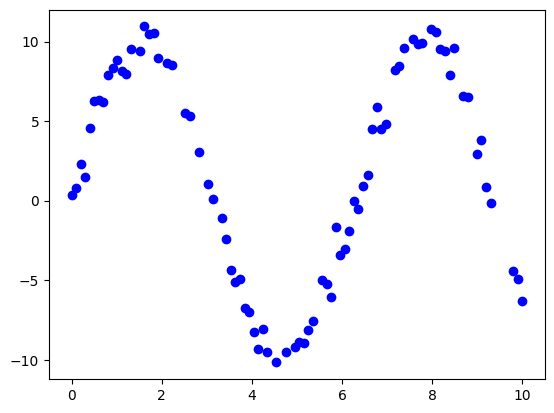

In [95]:
# Generate data
X = np.linspace(0, 10, 100).reshape(-1, 1)  # Ensure X is 2D
Y = (np.sin(X).flatten() + np.random.normal(0, 0.1, 100)) * 10

# Shuffle data
indices = np.arange(100)
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices].reshape(-1, 1)

# Split data
train_X, test_X = X[:80], X[80:]
train_Y, test_Y = Y[:80], Y[80:]

# Plot the training data
plt.scatter(train_X, train_Y, marker='o', color='b')

In [96]:

# Train
net = TAGI([1, 50, 1])
train_X = net.standardize_data(train_X)
train_Y = net.standardize_data(train_Y)

epochs = 10
for epoch in range(epochs):
    for x, y in zip(train_X, train_Y):
        net.forward(x)
        net.backward(y)

In [97]:
# Predict
test_Y_pred = []
for x in test_X:
    prediction = net.forward(x)
    test_Y_pred.append(prediction)
test_Y_pred = np.array(test_Y_pred).flatten()
test_Y_pred = net.unstandardize_data(test_Y_pred)

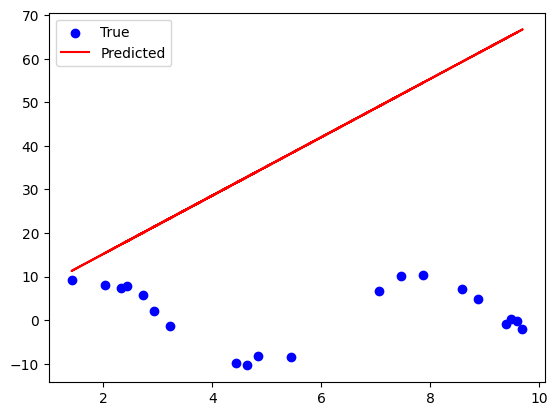

In [98]:
# Plot
plt.scatter(test_X.flatten(), test_Y, color='blue', label='True')
plt.plot(test_X.flatten(), test_Y_pred.flatten(), color='red', label='Predicted')
plt.legend()
plt.show()